# Analiza rezultatov maratona na OI

V svoji projektni nalogi bom analiziral rezultate maratonov s petih olimpijskih iger v letih 2000-2016. Podatke sem našel na [spletni strani olimpijskih iger](https://olympics.com/en). Z vsakih OI sem zajel najboljših 50 rezultatov in jih shranil v združeno datoteko *tek.csv*.

In [95]:
import pandas as pd
pd.set_option('display.max_rows', 20)
rezultati = pd.read_csv('obdelani_podatki/tek.csv',index_col='Leto')

## Začetni pregled

Za začetek si oglejmo medaliste s petih OI med leti 2000 in 2016. Čas smo navedli v običajnem formatu ure : minute : sekunde in v številu sekund.

In [96]:
rezultati[rezultati.Mesto <= 3].sort_values('Leto', ascending=True)

,Mesto,Ime,Priimek,Čas,Sekunde,Država
Leto,,,,,,
2000,1,Gezahegne,ABERA,2:10:11,7811,Ethiopia
2000,2,Erick,WAINAINA,2:10:31,7831,Kenya
2000,3,Tesfaye,TOLA,2:11:10,7870,Ethiopia
2004,1,Stefano,BALDINI,2:10:55,7855,Italy
2004,2,Mebrahtom,KEFLEZIGHI,2:11:29,7889,United States of America
2004,3,Vanderlei,DE LIMA,2:12:11,7931,Brazil
2008,1,Samuel,WANJIRU,2:06:32,7592,Kenya
2008,2,Jaouad,GHARIB,2:07:16,7636,Morocco
2008,3,Tsegay,KEBEDE,2:10:00,7800,Ethiopia


Poglejmo še najboljših 10 doseženih rezultatov v opazovanem obdobju.

In [97]:
rezultati.sort_values('Čas', ascending=True).head(10)

,Mesto,Ime,Priimek,Čas,Sekunde,Država
Leto,,,,,,
2008,1,Samuel,WANJIRU,2:06:32,7592,Kenya
2008,2,Jaouad,GHARIB,2:07:16,7636,Morocco
2012,1,Stephen,KIPROTICH,2:08:01,7681,Uganda
2012,2,Abel,KIRUI,2:08:27,7707,Kenya
2016,1,Eliud,KIPCHOGE,2:08:44,7724,Kenya
2012,3,Wilson Kipsang,KIPROTICH,2:09:37,7777,Kenya
2016,2,Feyisa,LILESA,2:09:54,7794,Ethiopia
2008,3,Tsegay,KEBEDE,2:10:00,7800,Ethiopia
2016,3,Galen,RUPP,2:10:05,7805,United States of America


## Povprečja in standardni odkloni

Zanimajo nas povprečni časi najboljših 50 tekmovalcev glede na posamezne OI. V tabeli so povprečni časi navedeni v sekundah in za lažjo predstavu tudi v formatu ure : minute : sekunde. Na grafu so povprečni časi navedeni v sekundah. Vidimo trend zmanjševanja povprečnega časa skozi leta, kar kaže na napredek tekmovalcev. Od leta 2000 do leta 2016 se je povprečni čas prvih 50 tekmovalcev zmanjšal za minuto in 46 sekund.

      Povprečje v sekundah Povprečje
Leto                                
2000               8269.00   2:17:49
2004               8271.38   2:17:51
2008               8209.10   2:16:49
2012               8145.26   2:15:45
2016               8103.96   2:15:03


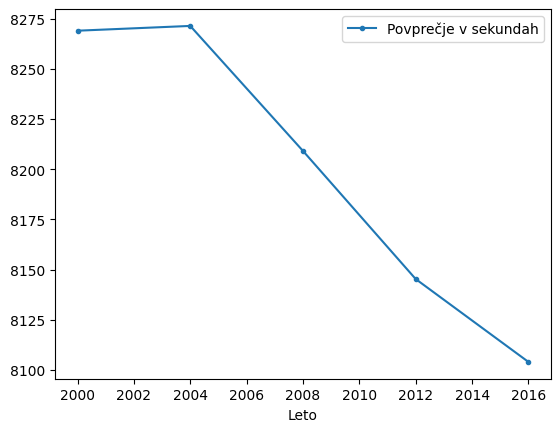

In [98]:
def sek_v_ure(cas_v_sek):
    ure = int(cas_v_sek) // 3600
    str_ure = str(ure)
    ostanek = int(cas_v_sek) % 3600
    minute = ostanek // 60
    str_minute = str(minute)
    if len(str_minute) == 1:
        str_minute = '0' + str_minute
    sekunde = ostanek % 60
    str_sekunde = str(sekunde)
    if len(str_sekunde) == 1:
        str_sekunde = '0' + str_sekunde
    locen_cas = f'{str_ure}:{str_minute}:{str_sekunde}'
    return locen_cas

rezultati_po_letih = rezultati.groupby('Leto')
povprecja = rezultati_po_letih.Sekunde.mean()
povprecja_tabela = povprecja.to_frame()
povprecja_tabela.rename(columns={"Sekunde": "Povprečje v sekundah"}, inplace=True)
povprecja_tabela.plot(style='.-')
povprecja_tabela['Povprečje'] = povprecja_tabela['Povprečje v sekundah'].apply(sek_v_ure)
print(povprecja_tabela)

Analizirajmo še standardne odklone po posameznih letih. Časi so bili najbolj raznoliki na OI v Pekingu leta 2008, najmanj pa v Riu leta 2016.

      Std. odklon v sekundah Std. odklon
Leto                                    
2000                  204.19     0:03:24
2004                  189.92     0:03:09
2008                  277.94     0:04:37
2012                  186.82     0:03:06
2016                  155.74     0:02:35


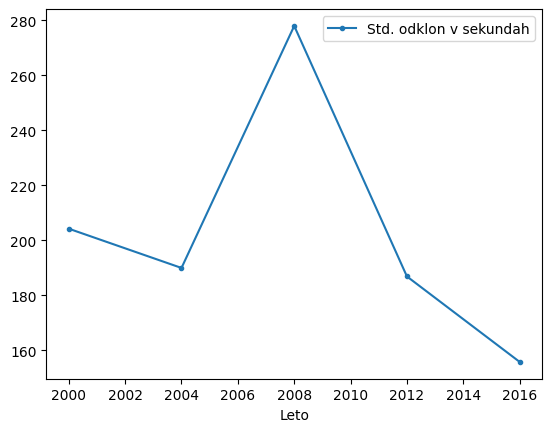

In [99]:
std_odkloni = rezultati_po_letih.Sekunde.std().round(2)
std_odkloni_tabela = std_odkloni.to_frame()
std_odkloni_tabela.rename(columns={"Sekunde": "Std. odklon v sekundah"}, inplace=True)
std_odkloni_tabela.plot(style='.-')
std_odkloni_tabela['Std. odklon'] = std_odkloni_tabela['Std. odklon v sekundah'].apply(sek_v_ure)
print(std_odkloni_tabela)

## Uspešnost po državah

Analizirali bomo uspešnost posameznih držav glede na število predstavnikov med najboljših 50 v letih 2000-2016. Vidimo, da so dokaj enakomerno zastopane države z vseh celin.

<Axes: xlabel='Država'>

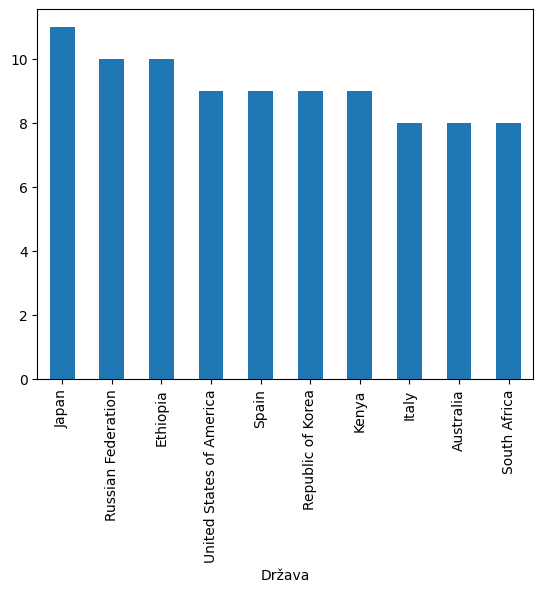

In [100]:
rezultati_po_drzavah = rezultati.groupby(by=['Država']).size()
rezultati_po_drzavah.sort_values(inplace= True,ascending=False)
rezultati_po_drzavah.head(10).plot.bar()

Oglejmo si še uspešnost držav glede na število medalistov. Tukaj je bolj vidna prevlada afriških držav, posebej Kenije in Etiopije.

<Axes: xlabel='Država'>

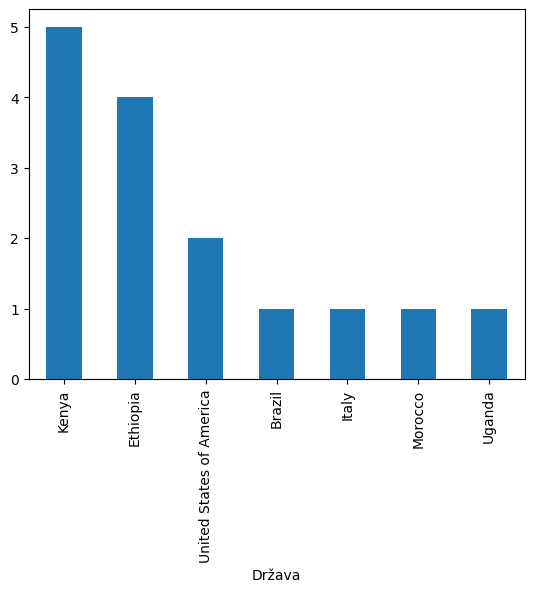

In [101]:
top_3 = rezultati[rezultati.Mesto <= 3]
rezultati_po_drzavah_3 = top_3.groupby(by=['Država']).size()
rezultati_po_drzavah_3.sort_values(inplace= True,ascending=False)
rezultati_po_drzavah_3.head(10).plot.bar()

## Najuspešnejši posamezniki

Oglejmo si posameznike z največ uvrstitvami med najboljših 50. Pet tekmovalcev se je trikrat uvrstilo med najboljših 50.

<Axes: xlabel='Ime,Priimek,Država'>

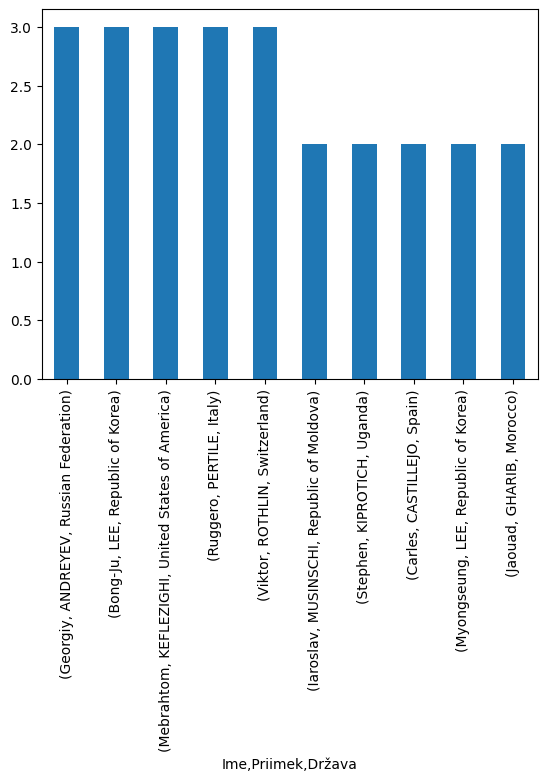

In [102]:
rezultati_posamezniki = rezultati.groupby(by=['Ime', 'Priimek', 'Država']).size()
rezultati_posamezniki.sort_values(inplace= True,ascending=False)
rezultati_posamezniki.head(10).plot.bar()

Oglejmo si posameznike z največ uvrstitvami med najboljših 10. Samo trije tekmovalci so se dvakrat uvrstili med najboljših 10.

<Axes: xlabel='Ime,Priimek,Država'>

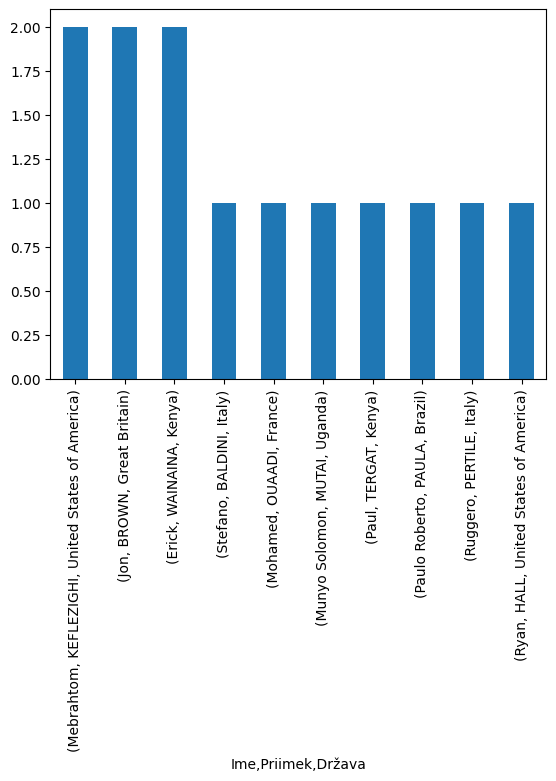

In [103]:
top_10 = rezultati[rezultati.Mesto <= 10]
rezultati_posamezniki_10 = top_10.groupby(by=['Ime', 'Priimek', 'Država']).size()
rezultati_posamezniki_10.sort_values(inplace= True,ascending=False)
rezultati_posamezniki_10.head(10).plot.bar()

## Vpliv temperature na rezultate

Zanima nas, če ima temperatura v času maratonov vpliv na rezultate. Pričakovali bi, da višja temperatura povzroči slabše rezultate, torej pozitivno korelacijo med temperaturo v °C in številom sekund. Na grafu so prikazani povprečni rezultati in temperature za posamezno leto. Izračunali smo tudi Pearsonov korelacijski koeficient med temperaturo in povprečnim rezultatom v sekundah, kjer vrednost 0 pomeni ničelno korelacijo, vrednost 1 pa popolno korelacijo med spremenljivkama. Dobili smo rezultat 0,204, kar je praktično zanemarljiva korelacija.

      Povprečje v sekundah Povprečje  Temperatura [°C]
Leto                                                  
2000               8269.00   2:17:49                20
2004               8271.38   2:17:51                30
2008               8209.10   2:16:49                26
2012               8145.26   2:15:45                23
2016               8103.96   2:15:03                24


,Povprečje v sekundah,Temperatura [°C]
Povprečje v sekundah,1.000,0.204
Temperatura [°C],0.204,1.000


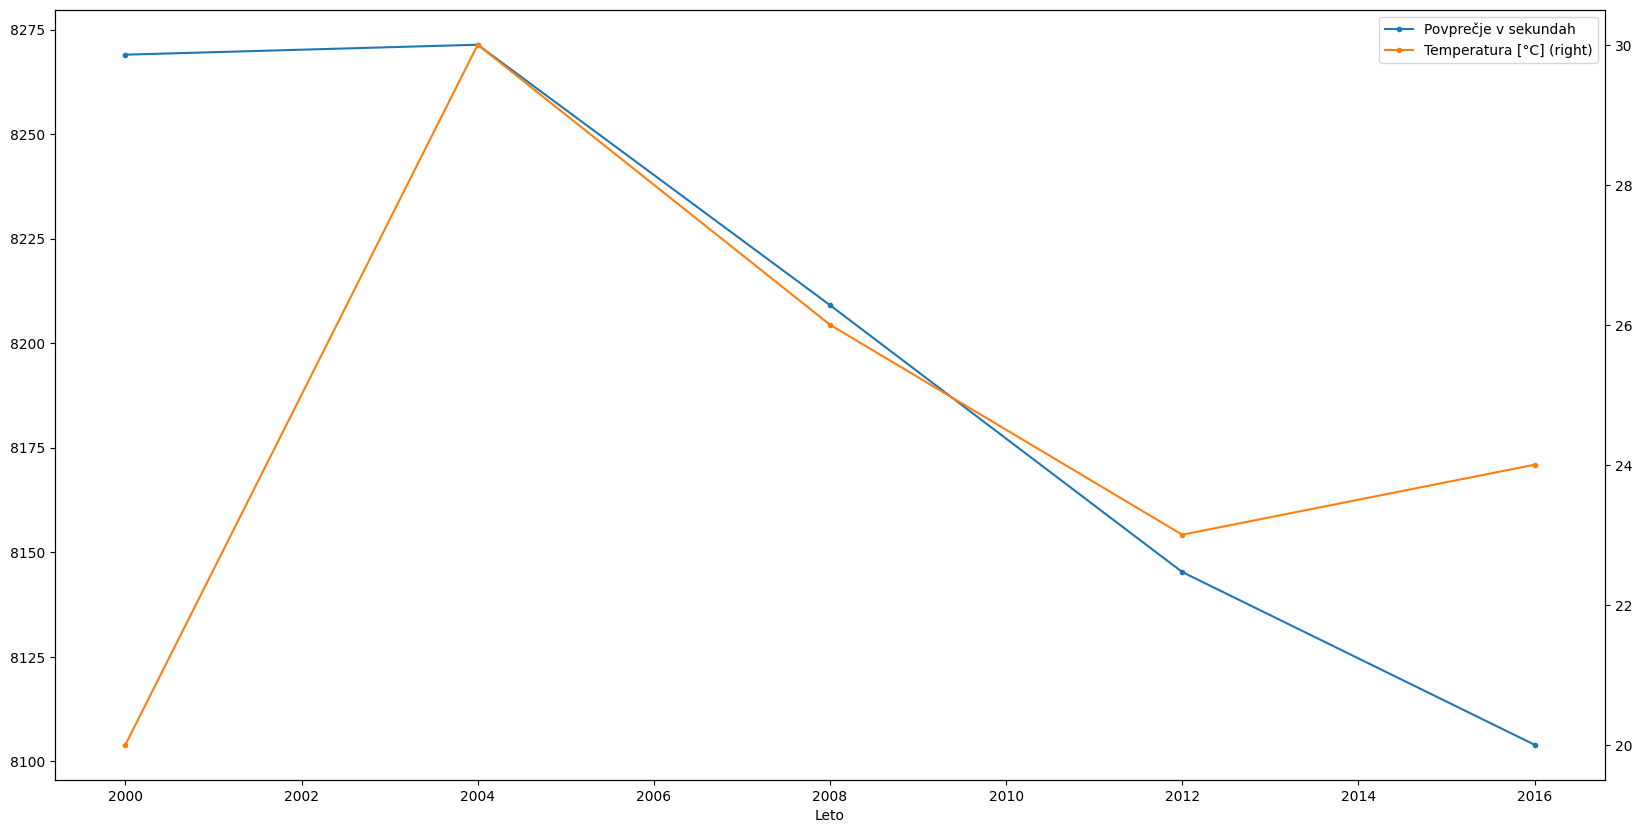

In [104]:
povprecja_tabela['Temperatura [°C]'] = [20, 30, 26, 23, 24]
print(povprecja_tabela)
povprecja_tabela_leto = povprecja_tabela.copy()
povprecja_tabela_leto['Leto'] = [2000, 2004, 2008, 2012, 2016]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10)) 

povprecja_tabela_leto.plot(x = 'Leto', y = 'Povprečje v sekundah', ax = ax, style='.-')
povprecja_tabela_leto.plot(x = 'Leto', y = 'Temperatura [°C]', ax = ax, secondary_y = True, style = '.-')

povprecja_in_temp = povprecja_tabela.drop(columns=['Povprečje'])
povprecja_in_temp.corr(method='pearson').round(3)
